#**Cargar Librerias**

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Gráficos
import matplotlib.pyplot as plt

In [3]:
#Cargamos los CSV con los Datos
#data = pd.read_csv(base_dir + "NFLX.csv",  index_col='Date', parse_dates=['Date'])
data = pd.read_csv('/content/NFLX.csv')
# parse_dates=['Date']: Indica que la columna Date debe ser interpretada
# como datos de tipo fecha (datetime64[ns] en pandas).
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600


##**Columnas del Dataset de Netflix**

## **Open:** Precio de apertura de la acción en el mercado para un día, semana o mes (dependiendo del intervalo del dataset).

## **High:** Precio más alto alcanzado por la acción durante el período seleccionado (día, semana o mes).

## **Low:** Precio más bajo alcanzado por la acción durante el período seleccionado.

## **Close:** Precio de cierre de la acción al final del período seleccionado. Representa el último precio negociado antes de que el mercado cerrara.

## **Adj Close (Adjusted Close):** Precio de cierre ajustado para reflejar eventos corporativos como dividendos, splits (división de acciones), o cualquier otro ajuste significativo. Es útil para análisis históricos porque refleja el valor real que el inversionista habría experimentado.

## **Volume:** Número total de acciones negociadas durante el período seleccionado. Representa el nivel de actividad del mercado para la acción.

**Ejemplo**
- Date	Open	High	Low	Close	Adj Close	Volume
- 2023-01-01	300.0	310.0	295.0	305.0	304.5	1,000,000

**Esto significa:**

El 1 de enero de 2023, la acción de Netflix abrió en $300.
Durante ese día/mes alcanzó un máximo de $310 y un mínimo de $295.
Cerró en $305. Ajustando por eventos corporativos, el precio ajustado de cierre es $304.5.  Se negociaron un millón de acciones.

In [4]:
# Breve descripcion del dataset

# Mostramos el numero de filas y columnas
print(data.shape)

print('_____________________\n')
print(data.dtypes)

# Salto de linea
print('_____________________\n')

# Informacion Basica del Dataset
data.info()

(3119, 7)
_____________________

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
_____________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3119 non-null   object 
 1   Open       3119 non-null   float64
 2   High       3119 non-null   float64
 3   Low        3119 non-null   float64
 4   Close      3119 non-null   float64
 5   Adj Close  3119 non-null   float64
 6   Volume     3119 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 170.7+ KB


In [ ]:
# Descripción estadística
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3.119000e+03
mean,185.774606,188.574990,182.773507,185.747629,185.747629,1.879939e+07
std,182.675775,185.222112,179.874082,182.575796,182.575796,2.091301e+07
min,6.960000,7.178571,6.931429,7.018571,7.018571,1.144000e+06
25%,33.255714,33.815000,32.611429,33.328571,33.328571,6.233250e+06
50%,100.209999,102.110001,98.529999,100.230003,100.230003,1.232560e+07
75%,336.800003,342.384995,331.125000,337.539993,337.539993,2.342225e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.155418e+08


* El precio de apertura promedio fue \$150.30, mientras que el precio de cierre promedio fue \$155.86, lo que indica un crecimiento general en el período analizado.
* El volumen de operaciones varió entre 91.43M y 208.66M.

In [5]:
# Verificar si hay fechas duplicadas en el índice
data.index.duplicated().sum()

np.int64(0)

In [6]:
# Eliminar valores nulos para evitar problemas en los gráficos
data.dropna(inplace = True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600


## Como la fecha esta muy antigua nos conoctamos a  Yahoo Finance para descargar datos mas actuales

In [8]:
# Instalar la libreria
!pip install yfinance

# Importar la biblioteca
import yfinance as yf

+ start y end: Rango de fechas.
+ interval: Frecuencia de los datos (por ejemplo, "1d" para diarios, "1mo" para mensuales, "1wk" para semanales).

In [9]:
# Descargar datos históricos de Netflix
data_yf = yf.download("NFLX", start="2016-01-01", end="2025-2-7", interval="1mo")
data_yf

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2016-01-01,91.839996,122.180000,90.110001,109.000000,488193200
2016-02-01,93.410004,97.480003,79.949997,91.790001,389268900
2016-03-01,102.230003,104.910004,93.610001,94.580002,311333700
2016-04-01,90.029999,111.849998,88.209999,102.930000,340174300
2016-05-01,102.570000,104.000000,85.739998,90.410004,264997900
...,...,...,...,...,...
2024-10-01,756.030029,773.000000,677.880005,713.640015,85336900
2024-11-01,886.809998,908.000000,747.770020,753.479980,64164400


In [10]:
data_yf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2016-01-01 to 2025-02-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NFLX)   110 non-null    float64
 1   (High, NFLX)    110 non-null    float64
 2   (Low, NFLX)     110 non-null    float64
 3   (Open, NFLX)    110 non-null    float64
 4   (Volume, NFLX)  110 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.2 KB


In [ ]:
data_yf.index = pd.to_datetime(data_yf.index)

In [ ]:
# Informacion Basica del Dataset
data_yf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2016-01-01 to 2025-02-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NFLX)   110 non-null    float64
 1   (High, NFLX)    110 non-null    float64
 2   (Low, NFLX)     110 non-null    float64
 3   (Open, NFLX)    110 non-null    float64
 4   (Volume, NFLX)  110 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.2 KB


In [ ]:
print(data_yf.dtypes)

Price   Ticker
Close   NFLX      float64
High    NFLX      float64
Low     NFLX      float64
Open    NFLX      float64
Volume  NFLX        int64
dtype: object


In [11]:
# Descriptivas de los datos
data_yf.describe()

Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
count,110.000000,110.000000,110.000000,110.000000,1.100000e+02
mean,377.474001,404.854453,342.682092,370.176090,1.625804e+08
std,199.658677,208.421883,185.360252,192.843845,8.626468e+07
min,90.029999,97.480003,79.949997,90.410004,5.310840e+07
25%,223.894997,250.865005,188.055004,204.204998,9.900188e+07
50%,355.209991,383.980011,318.650009,353.869995,1.451574e+08
75%,502.114998,555.002487,465.764992,501.092506,2.080977e+08
max,980.559998,1064.500000,955.000000,973.000000,4.881932e+08


# **Limpieza**
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

* Datos faltantes en algunas celdas
* Columnas irrelevantes (que no responden al problema "*lo que queremos resolver*")
* Registros (filas) repetidos
* Valores fuera de orden o extremos (outliers) en el caso de las variables numéricas. *Se deben analizar en detalle pues no necesariamente la solución es eliminarlos*
* Errores digitación en el caso de las variables categóricas
* Al final de este proceso de limpieza se debe tener un dataset integro, listo para la fase de Análisis Exploratorio, que nos permita responder el problema

In [12]:
#Verificar si hay valores nulos, isnull() nos permite detectar datos nulos,
data_yf.isnull().sum()

,,0
Price,Ticker,
Close,NFLX,0
High,NFLX,0
Low,NFLX,0
Open,NFLX,0
Volume,NFLX,0


In [13]:
##Verificar si hay valores nulos, si lo prefieres puedes usar notnull() en vez de isnull():
data_yf.notnull().sum()

,,0
Price,Ticker,
Close,NFLX,110
High,NFLX,110
Low,NFLX,110
Open,NFLX,110
Volume,NFLX,110


In [14]:
#dropna: Eliminar valores nulos, esto solo se recomienda cuando hay muchos datos

# Dado que tenemos entre 1 y dos valores nulos por columna podemos eliminarlos
print(f'Tamaño del dataset antes de eliminar valores nulos: {data_yf.shape}')
print('\n')
data.dropna(inplace = True)
print(f'Tamaño del dataset después de eliminar los valores nulos: {data_yf.shape}')

Tamaño del dataset antes de eliminar valores nulos: (110, 5)


Tamaño del dataset después de eliminar los valores nulos: (110, 5)


In [15]:
data_yf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2016-01-01 to 2025-02-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NFLX)   110 non-null    float64
 1   (High, NFLX)    110 non-null    float64
 2   (Low, NFLX)     110 non-null    float64
 3   (Open, NFLX)    110 non-null    float64
 4   (Volume, NFLX)  110 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.2 KB


In [16]:
print(data_yf.columns)
print('__________________________________________\n')
print(data_yf.head())

MultiIndex([( 'Close', 'NFLX'),
            (  'High', 'NFLX'),
            (   'Low', 'NFLX'),
            (  'Open', 'NFLX'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])
__________________________________________

Price            Close        High        Low        Open     Volume
Ticker            NFLX        NFLX       NFLX        NFLX       NFLX
Date                                                                
2016-01-01   91.839996  122.180000  90.110001  109.000000  488193200
2016-02-01   93.410004   97.480003  79.949997   91.790001  389268900
2016-03-01  102.230003  104.910004  93.610001   94.580002  311333700
2016-04-01   90.029999  111.849998  88.209999  102.930000  340174300
2016-05-01  102.570000  104.000000  85.739998   90.410004  264997900


In [17]:
# Eliminar el nivel extra del MultiIndex en las columnas
data_yf.columns = data_yf.columns.droplevel(1)
data_yf

Price,Close,High,Low,Open,Volume
Date,,,,,
2016-01-01,91.839996,122.180000,90.110001,109.000000,488193200
2016-02-01,93.410004,97.480003,79.949997,91.790001,389268900
2016-03-01,102.230003,104.910004,93.610001,94.580002,311333700
2016-04-01,90.029999,111.849998,88.209999,102.930000,340174300
2016-05-01,102.570000,104.000000,85.739998,90.410004,264997900
...,...,...,...,...,...
2024-10-01,756.030029,773.000000,677.880005,713.640015,85336900
2024-11-01,886.809998,908.000000,747.770020,753.479980,64164400
2024-12-01,891.320007,941.750000,884.119995,887.510010,57207000


In [18]:
print(data_yf.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [19]:
clientes ={'nombre': 12, 'cedula': 12}

## **Columnas irrelevantes**

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown" desconocido.
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 18.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

- ***<ins>Si se tiene duda de si alguna columna</ins>* puede ser relevante o no lo mejor es dejarla** (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En el caso de este dataset todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor

In [20]:
# Para obtener el resumen estadístico de las categoricas:
data_yf.describe(include = 'object')

ValueError: No objects to concatenate

##**Filas repetidas o Duplicadas**

In [21]:
data_yf.duplicated().any()

np.False_

In [22]:
# Verificar si hay fechas duplicadas en el índice
data_yf.index.duplicated().sum()

np.int64(0)

In [23]:
print(f'Tamaño del dataset antes de eliminar las filas repetidas es: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del dataset después de eliminar las filas repetidas es: {data.shape}')

Tamaño del dataset antes de eliminar las filas repetidas es: (3119, 7)
Tamaño del dataset después de eliminar las filas repetidas es: (3119, 7)


In [ ]:
# Para cambiar el tipo puede usar cualquiera de los siguientes comandos

# df["dataframe_column"] = df["dataframe_column"].astype(float)
# df["dataframe_column"] = df["dataframe_column"].apply(int)
# df["dataframe_column"] = df["dataframe_column"].map(int)
# df=df.astype({'dataframe_column': 'string', 'dataframe_column':'float64',
#              'dataframe_column': 'datetime64[ns]', 'dataframe_column': 'int'})

# Pero para cambiar este tipo de datos se usa
# df['fecha']=pd.to_datetime(df["fecha"].dt.strftime('%d-%m-%Y'))

#combinar y dividir columnas
# df=df.replace(to_replace=r'.\(.+\)$', value='', regex=True)


#**Graficos Acciones**

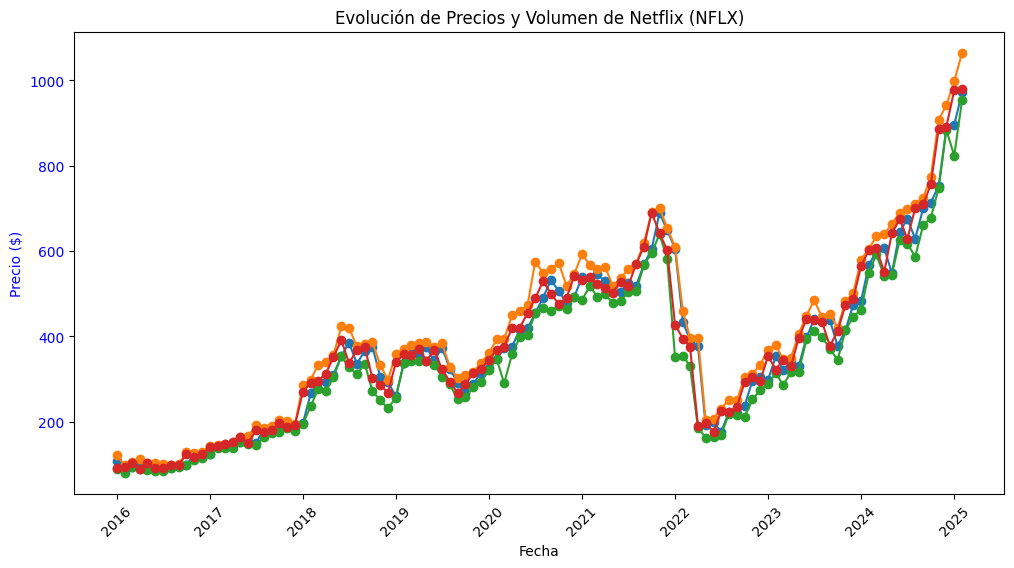

In [24]:
# Graficar los precios

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data_yf.index, data_yf['Open'], label='Open', marker='o')
ax1.plot(data_yf.index, data_yf['High'], label='High', marker='o')
ax1.plot(data_yf.index, data_yf['Low'], label='Low', marker='o')
ax1.plot(data_yf.index, data_yf['Close'], label='Close', marker='o')

# Etiquetas del eje principal (precios)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio ($)', color='blue')
ax1.set_title('Evolución de Precios y Volumen de Netflix (NFLX)')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotar etiquetas del eje X para mejorar legibilidad
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

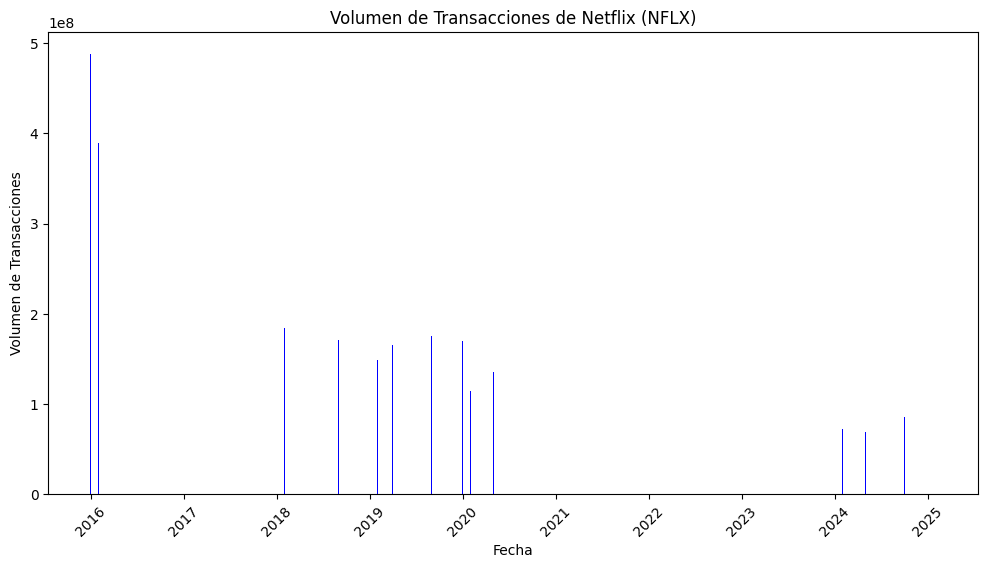

In [25]:
# Crear el gráfico de volumen de transacciones
plt.figure(figsize=(12, 6))
plt.bar(data_yf.index, data_yf['Volume'], color='blue', alpha=1)
plt.xlabel('Fecha')
plt.ylabel('Volumen de Transacciones')
plt.title('Volumen de Transacciones de Netflix (NFLX)')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.show()

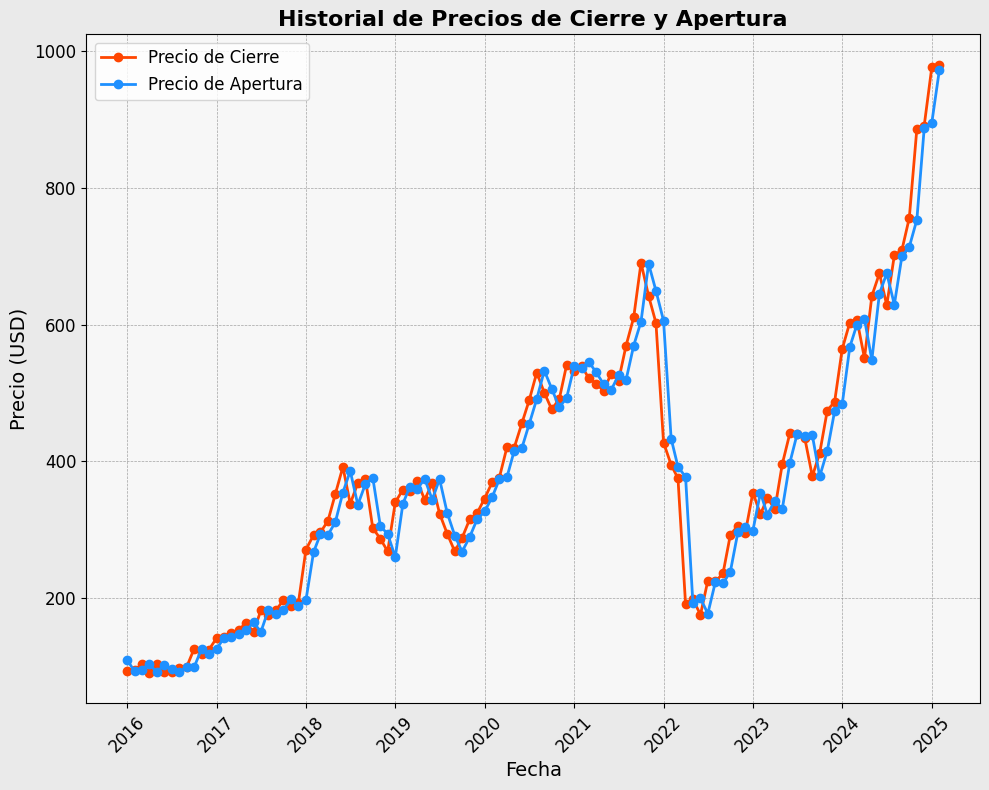

In [26]:
# Gráfico del historial de precios de cierre y apertura

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 8))
fig.set_facecolor('#EAEAEA')  # Fondo del gráfico

# Trazar los precios de cierre y apertura
ax.plot(data_yf.index, data_yf['Close'], marker="o", markersize=6, linewidth=2, linestyle='-', color="#FF4500", label='Precio de Cierre')
ax.plot(data_yf.index, data_yf['Open'], marker="o", markersize=6, linewidth=2, linestyle='-', color="#1E90FF", label='Precio de Apertura')

# Títulos y etiquetas
plt.title('Historial de Precios de Cierre y Apertura', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio (USD)', fontsize=14)

# Personalización del gráfico
ax.legend(fontsize=12)  # Leyenda con etiquetas de precios
ax.set_facecolor("#F7F7F7")  # Fondo del área de trazado
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Líneas de cuadrícula

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

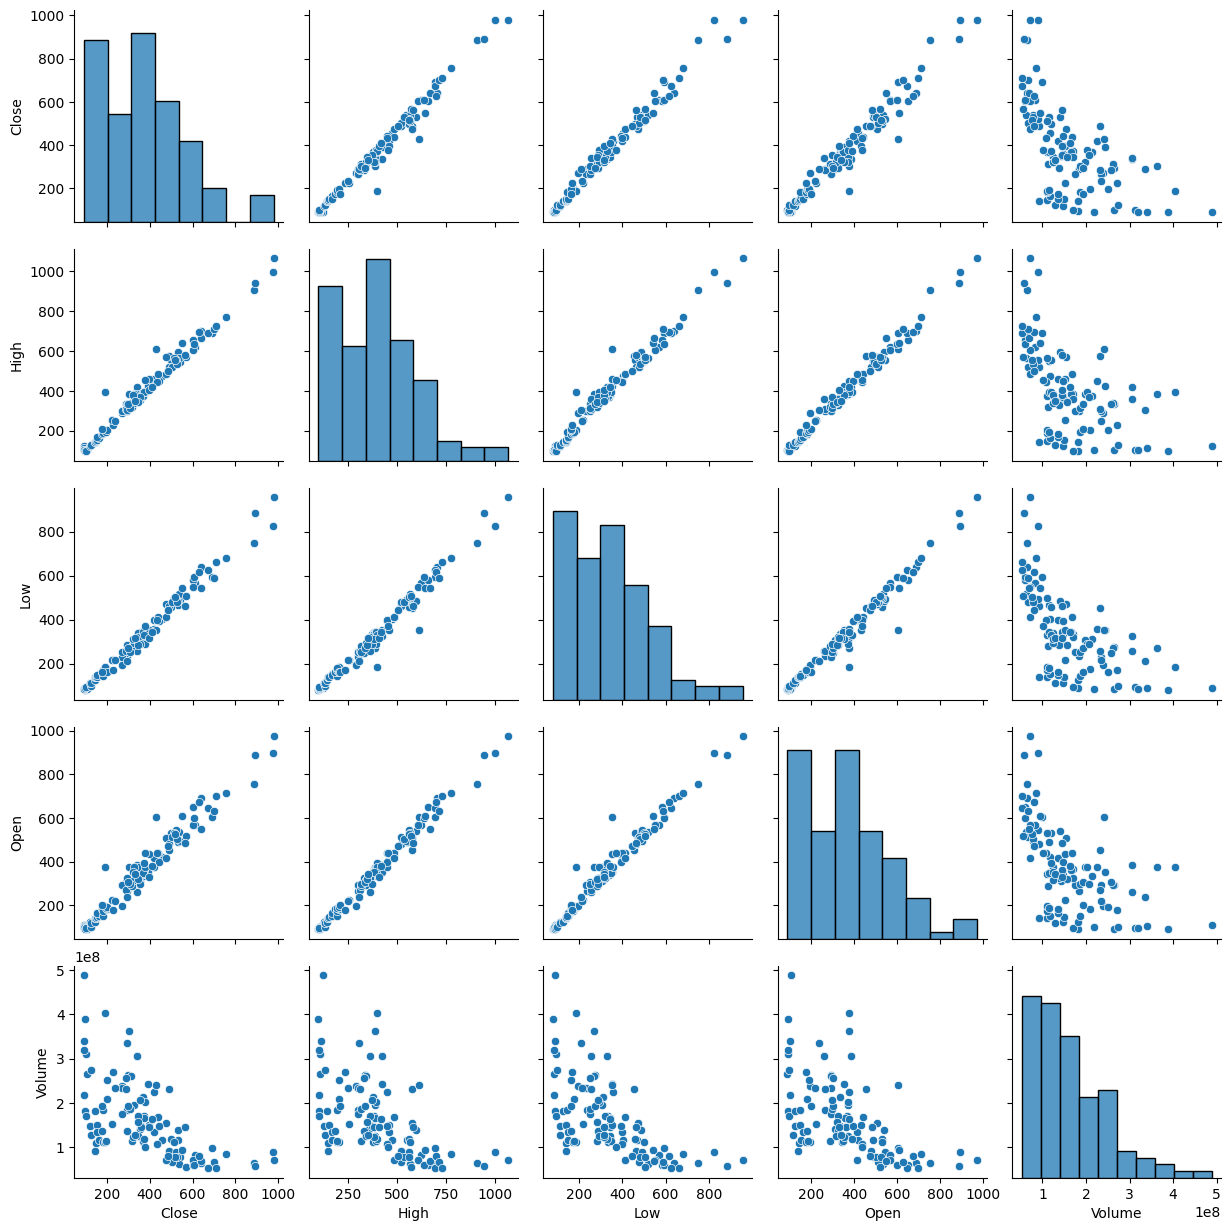

In [27]:
# Analisis multivariado
sns.pairplot(data_yf)

Price      Close      High       Low      Open    Volume
Price                                                   
Close   1.000000  0.988286  0.990668  0.975730 -0.605533
High    0.988286  1.000000  0.985480  0.992034 -0.550948
Low     0.990668  0.985480  1.000000  0.983690 -0.629549
Open    0.975730  0.992034  0.983690  1.000000 -0.575145
Volume -0.605533 -0.550948 -0.629549 -0.575145  1.000000


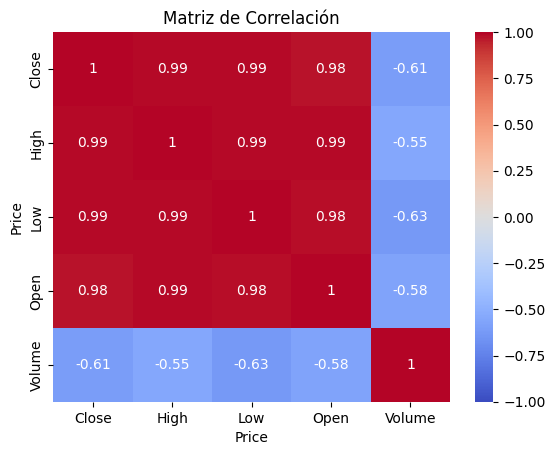

In [28]:
# Calcular la matriz de correlación
corr = data_yf.corr()

# Mostrar la matriz de correlación
print(corr)

# Visualizar la matriz de correlación con un heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

## **Separar los dados entre entrenamiento (train) y prueba (test)**

In [29]:
from sklearn.model_selection import train_test_split

# Seleccionar características (x) y objetivo (y)
X = data_yf[['Open', 'High', 'Low', 'Volume']]  # Variables independientes
y = data_yf['Close']  # Variable dependiente (target)

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Verificar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Tamaño del conjunto de entrenamiento: (88, 4)
Tamaño del conjunto de prueba: (22, 4)
(88, 4) (22, 4) (88,) (22,)


# **Grafico del conjunto de datos**

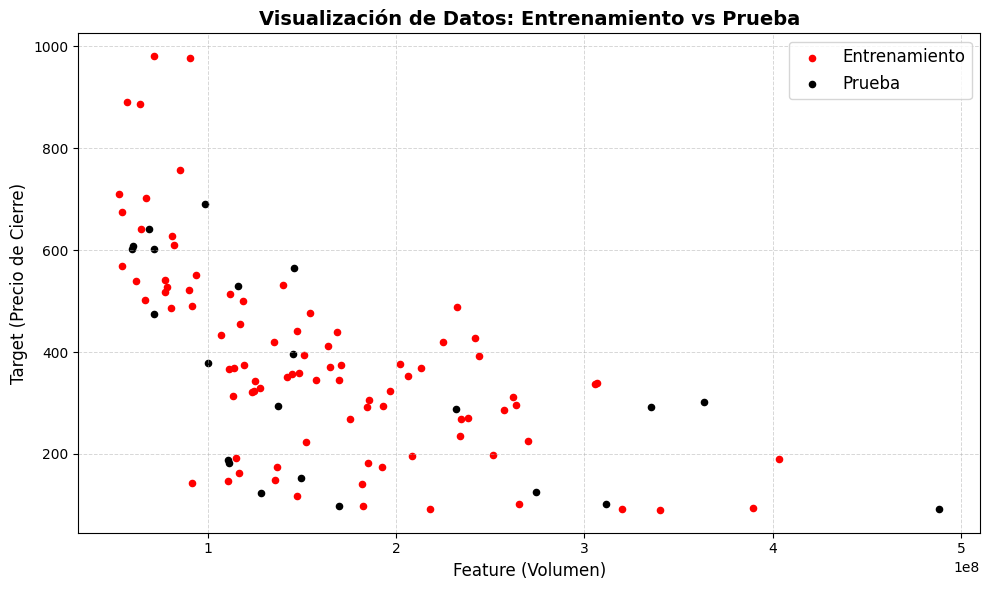

In [30]:
# Verificar que los datos estén en un formato adecuado (convertir a arrays si es necesario)
X_train_array = X_train.values if hasattr(X_train, 'values') else X_train
X_test_array = X_test.values if hasattr(X_test, 'values') else X_test
y_train_array = y_train.values if hasattr(y_train, 'values') else y_train
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test

# Crear el gráfico
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura

# Graficar el conjunto de entrenamiento
plt.scatter(X_train_array[:, 3], y_train_array, c='red', s=20, label='Entrenamiento')

# Graficar el conjunto de prueba
plt.scatter(X_test_array[:, 3], y_test_array, c='black', s=20, label='Prueba')

# Añadir etiquetas, título y leyenda
plt.title('Visualización de Datos: Entrenamiento vs Prueba', fontsize=14, fontweight='bold')
plt.xlabel('Feature (Volumen)', fontsize=12)  # Cambiar 'Feature' según el significado de X[:,3]
plt.ylabel('Target (Precio de Cierre)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5, linestyle='--', linewidth=0.7)  # Líneas de cuadrícula para claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## **Creación de modelo Random Forest**

##Un Random Forest (**Bosque Aleatorio**) es un algoritmo de aprendizaje automático basado en árboles de decisión.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ===========================
# Modelo: Random Forest Regressor
# ===========================

# Crear el modelo Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,        # Número de árboles
    max_depth=10,            # Profundidad máxima de los árboles
    random_state=42          # Garantizar reproducibilidad
)

##**Entrenamiento de modelo Random Forest**

In [33]:
# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

##**Realizar predicciones Random Forest**

In [34]:
# Realizar predicciones en el conjunto de prueba

rf_predictions = rf_model.predict(X_test)

# Mostrar las primeras 5 predicciones para verificar el formato
print("Primeras 5 predicciones:", rf_predictions[:5])


Primeras 5 predicciones: [190.16300293 192.05960159 311.84540436  93.23480019 294.97250061]


##**Aplicar metricas Random Forest**

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular métricas para la regresión
rf_mse = mean_squared_error(y_test, rf_predictions)
rt_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Mostrar las métricas
print("=== Métricas del Random Forest ===")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Mean Absolute Error (MAE): {rt_mae:.4f}")
print(f"R² (Coeficiente de Determinación): {rf_r2:.4f}")

=== Métricas del Random Forest ===
Mean Squared Error (MSE): 1285.1033
Mean Absolute Error (MAE): 27.3027
R² (Coeficiente de Determinación): 0.9683


##**Graficar las predicciones y valores reales Random Forest**

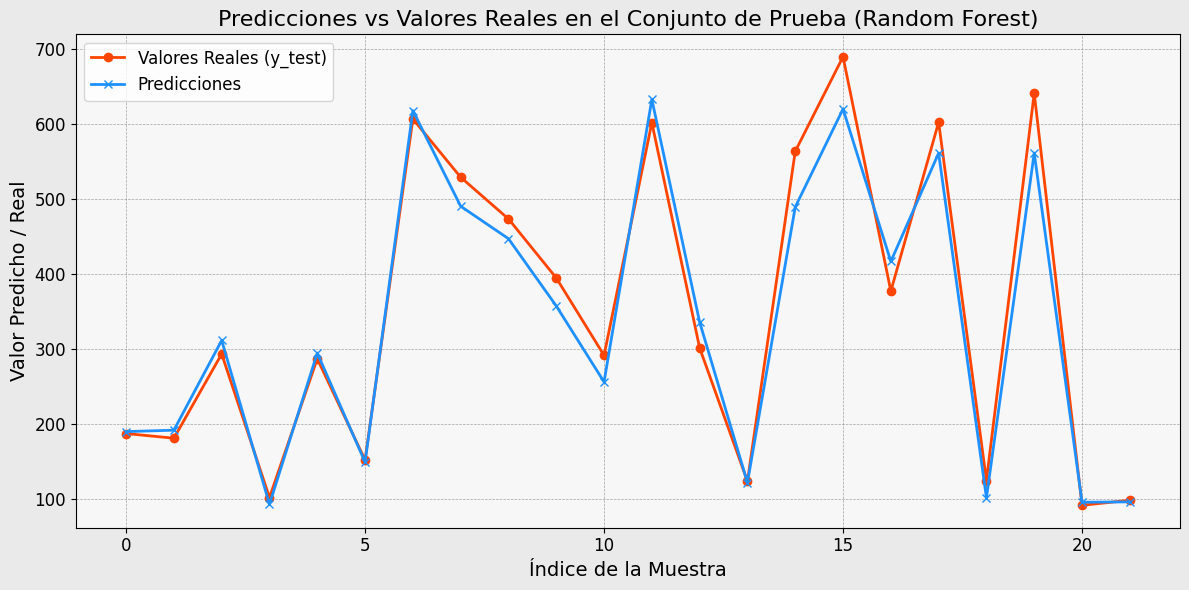

In [36]:
# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 6))  # Tamaño del gráfico
fig.set_facecolor('#EAEAEA')  # Fondo de la figura

# Predicciones y valores reales
ax.plot(
    range(len(y_test)),
    y_test,
    marker="o", markersize=6, linewidth=2, linestyle='-',
    color="#FF4500", label='Valores Reales (y_test)'
)
ax.plot(
    range(len(rf_predictions)),
    rf_predictions,
    marker="x", markersize=6, linewidth=2, linestyle='-',
    color="#1E90FF", label='Predicciones'
)

# Títulos y etiquetas
plt.title('Predicciones vs Valores Reales en el Conjunto de Prueba (Random Forest)', fontsize=16)
plt.xlabel('Índice de la Muestra', fontsize=14)
plt.ylabel('Valor Predicho / Real', fontsize=14)

# Personalización del gráfico
ax.legend(fontsize=12)  # Leyenda
ax.set_facecolor("#F7F7F7")  # Fondo del área de trazado
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Líneas de cuadrícula

# Mejorar la visibilidad de las etiquetas
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()



#**Regresión Lineal**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===========================
# Modelo: regresión lineal
# ===========================

regresion = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regresion.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_regresion = regresion.predict(X_test)

# Mostrar las primeras 5 predicciones para verificar el formato
print("Primeras 5 predicciones:", y_pred_regresion[:5])


Primeras 5 predicciones: [202.72334542 196.43700518 303.71880988  91.58520878 287.48007536]


In [38]:
# Calcular métricas para la regresión
mse_regresion = mean_squared_error(y_test, y_pred_regresion)
mae_regresion = mean_absolute_error(y_test, y_pred_regresion)
r2_regresion = r2_score(y_test, y_pred_regresion)

# Mostrar las métricas
print("=== Métricas de la Regresión Lineal ===")
print(f"Mean Squared Error (MSE): {mse_regresion:.4f}")
print(f"Mean Absolute Error (MAE): {mae_regresion:.4f}")
print(f"R² (Coeficiente de Determinación): {r2_regresion:.4f}")

=== Métricas de la Regresión Lineal ===
Mean Squared Error (MSE): 229.1129
Mean Absolute Error (MAE): 12.3165
R² (Coeficiente de Determinación): 0.9943


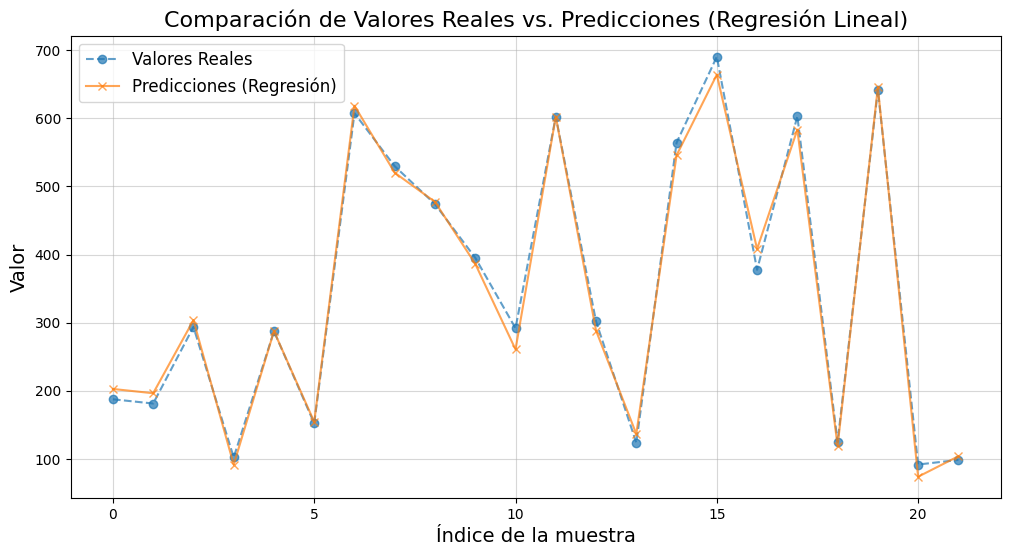

In [39]:
# ===========================
# Gráfico Comparativo
# ===========================

# Comparación gráfica entre valores reales y predicciones de la regresión
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Valores Reales", marker="o", linestyle="--", alpha=0.7)
plt.plot(range(len(y_pred_regresion)), y_pred_regresion, label="Predicciones (Regresión)", marker="x", linestyle="-", alpha=0.7)
plt.title("Comparación de Valores Reales vs. Predicciones (Regresión Lineal)", fontsize=16)
plt.xlabel("Índice de la muestra", fontsize=14)
plt.ylabel("Valor", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

#**Maquina de soporte vectorial SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ===========================
# Modelo: Soporte Vectorial para Regresión (SVM)
# ===========================

# Crear el modelo SVR con kernel radial (RBF), linear
svm_model = SVR(kernel='linear', C=100, gamma=0.1, epsilon=0.1)

# Entrenar el modelo con los datos sin escalar
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
svm_predictions = svm_model.predict(X_test)

In [ ]:
# ===========================
# Evaluación de Métricas
# ===========================

# Calcular métricas de evaluación
mse_svm = mean_squared_error(y_test, svm_predictions)
mae_svm = mean_absolute_error(y_test, svm_predictions)
r2_svm = r2_score(y_test, svm_predictions)

# Imprimir las métricas
print("=== Métricas para SVM ===")
print(f"Mean Squared Error (MSE): {mse_svm:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svm:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_svm:.4f}")

=== Métricas para SVM ===
Mean Squared Error (MSE): 589.8148
Mean Absolute Error (MAE): 20.1572
Coeficiente de Determinación (R²): 0.9834


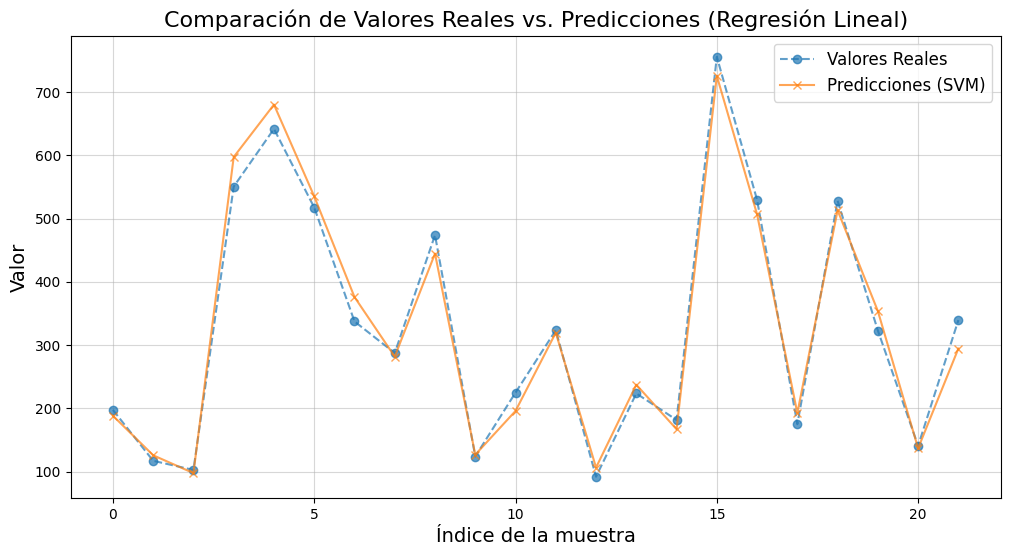

In [ ]:
# ===========================
# Gráfico Comparativo
# ===========================

# Comparación gráfica entre valores reales y predicciones de la regresión
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Valores Reales", marker="o", linestyle="--", alpha=0.7)
plt.plot(range(len(svm_predictions)), svm_predictions, label="Predicciones (SVM)", marker="x", linestyle="-", alpha=0.7)
plt.title("Comparación de Valores Reales vs. Predicciones (Regresión Lineal)", fontsize=16)
plt.xlabel("Índice de la muestra", fontsize=14)
plt.ylabel("Valor", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


##**Análisis de las métricas**

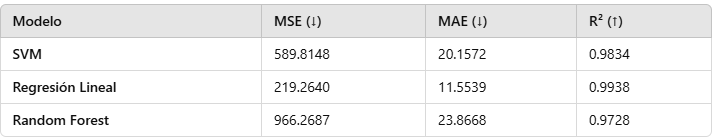



##**Exportar un modelo utilizando la biblioteca pickle.**

##pickle es una biblioteca estándar de Python que permite serializar y deserializar objetos.

In [40]:
import pickle

# Exportar el modelo entrenado
# Nombre un archivo llamado modelo_entrenado.pckl en modo de escritura binaria (wb).
with open('modelo_entrenado.pckl', 'wb') as file:
    pickle.dump(regresion, file)
# Serializa el modelo modelo y lo escribe en el archivo.

print("Modelo guardado exitosamente en 'modelo_entrenado.pckl'.")

Modelo guardado exitosamente en 'modelo_entrenado.pckl'.


In [41]:
!pip install flask flask-ngrok

In [42]:
!pip install pyngrok
from pyngrok import ngrok
ngrok.set_auth_token("2p5h3D7mAHjd74i040YBTo9vFOK_3Lc78AR4j6vTzq2E8iWq7")

In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np
from pyngrok import ngrok

app = Flask(__name__)

# Ruta para predicciones
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    if not all(key in data for key in ["Open", "High", "Low", "Volume"]):
        return jsonify({"error": "Faltan parámetros de entrada"}), 400
    input_data = np.array([[data["Open"], data["High"], data["Low"], data["Volume"]]])
    prediction = model.predict(input_data)
    prediction = np.array2string(prediction)
    return jsonify({"prediction": prediction})

if __name__ == '__main__':
    modelfile = 'modelo_entrenado.pckl'
    model = pickle.load(open(modelfile, 'rb'))
    print("LOG: serving model", model.__class__.__name__)
    public_url = ngrok.connect(5000)
    print(" * Public URL:", public_url)
    app.run()

LOG: serving model LinearRegression
 * Public URL: NgrokTunnel: "https://5a79-34-74-68-16.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [17/May/2025 14:19:08] "POST /predict HTTP/1.1" 200 -


#**Comparar Red Neuronal vs Random Forest**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 180811.8594 - mae: 379.0579 - val_loss: 163472.1875 - val_mae: 350.6978
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 187447.2656 - mae: 389.4296 - val_loss: 163294.8438 - val_mae: 350.4121
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 184629.5156 - mae: 387.2566 - val_loss: 163105.4844 - val_mae: 350.1006
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 186003.8750 - mae: 384.2675 - val_loss: 162881.2969 - val_mae: 349.7398
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 167688.7500 - mae: 367.7110 - val_loss: 162590.6094 - val_mae: 349.2890
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 201646.5156 - mae: 404.9127 - val_loss: 162211.9062 - val_mae: 348.7202
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 179055.8281 - mae: 376.5172 - val_loss: 161755.7812 - val_mae: 348.0124
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 204760.3438 - mae: 402.9204 - val_loss: 1611

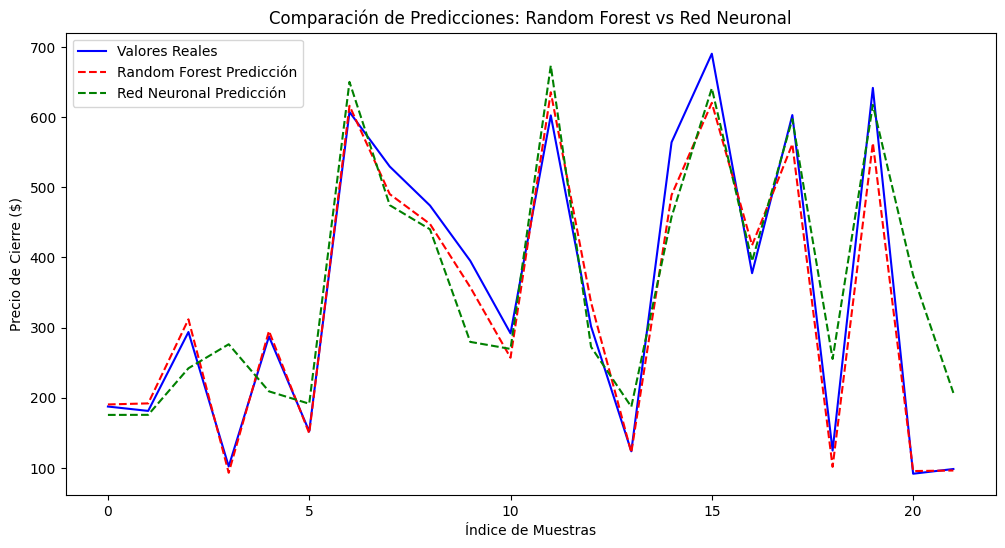

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normalizar los datos (importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===========================
# Modelo: Red Neuronal Artificial (MLP - Multi-Layer Perceptron)
# ===========================

# Definir la arquitectura del modelo
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(1)  # Capa de salida (regresión)
])

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Realizar predicciones en el conjunto de prueba
nn_predictions = nn_model.predict(X_test_scaled).flatten()

# Evaluación de la red neuronal
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

# ===========================
# Comparación de Modelos: Random Forest vs Red Neuronal
# ===========================

# Evaluación del modelo Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Mostrar métricas
comparison_results = pd.DataFrame({
    "Modelo": ["Random Forest", "Red Neuronal"],
    "MSE": [rf_mse, nn_mse],
    "MAE": [rf_mae, nn_mae],
    "R² Score": [rf_r2, nn_r2]
})

print(comparison_results)

# ===========================
# Visualización de Resultados
# ===========================

# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(12, 6))

plt.plot(y_test.values, label="Valores Reales", color="blue")
plt.plot(rf_predictions, label="Random Forest Predicción", linestyle="dashed", color="red")
plt.plot(nn_predictions, label="Red Neuronal Predicción", linestyle="dashed", color="green")

plt.xlabel("Índice de Muestras")
plt.ylabel("Precio de Cierre ($)")
plt.title("Comparación de Predicciones: Random Forest vs Red Neuronal")
plt.legend()
plt.show()
